# Мини проект по анализу клиентов

## Описание данных
**user_data:**

client – идентификатор пользователя  
premium – является ли клиент премиальным  
age – возраст

**logs:**

client – идентификатор пользователя  
success – результат (успех – 1, нет – 0)  
platform – платформа  
time – время в формате Unix

## Задачи
1. Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Определить какой клиент совершил больше всего успешных операций? 
3. С какой платформы осуществляется наибольшее количество успешных операций
4. Какую платформу предпочитают премиальные клиенты?
4. Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
5. Построить график распределения числа успешных операций.
6. Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста. Определить клиенты какого возраста совершили наибольшее количество успешных действий?

## Задача 1
Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [34]:
import pandas as pd
import seaborn as sns

In [33]:
df_user_data = pd.read_csv("user_data.csv")
df_logs = pd.read_csv("logs.csv")

In [12]:
df_user_data.info() # Смотрим пропуски и инфу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [14]:
df_logs.describe() # Описательная стат

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


## Задача 2
Определить какой клиент совершил больше всего успешных операций?

In [17]:
success_counts = df_logs.loc[df_logs.success == True].client.value_counts()

In [18]:
success_counts

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

Отфильтруем клиентов по максимальному числу успешных операций

In [22]:
max_success = success_counts.max() # максимальное число успешных операций
max_success_users = success_counts.loc[success_counts == max_success]
max_success_users.count() # количество клиентов с макс. success

9

## Задача 3
С какой платформы осуществляется наибольшее количество успешных операций?  

In [32]:
df_logs.loc[df_logs.success == True].platform.value_counts() 
# с телефона происходит большинство заказов

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

## Задача 4
Какую платформу предпочитают премиальные клиенты?

In [30]:
premium_logs = df_logs.merge(df_user_data, on='client')

In [31]:
premium_logs.loc[premium_logs.premium == True].platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

## Задача 5
Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет).

C:\Users\nsafo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


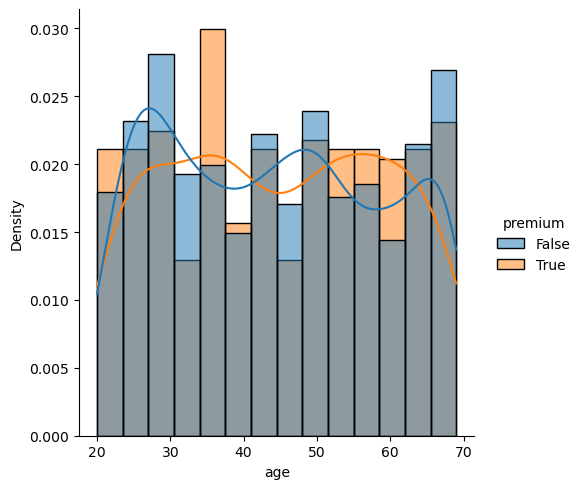

In [35]:
sns.displot(data=premium_logs, x='age', hue='premium', kde=True, kind='hist',
            stat='density', common_norm=False, bins=14)

## Задача 6
Построить график распределения числа успешных операций.  

In [38]:
success_counts = df_logs.loc[df_logs.success == True].client.value_counts()
success_counts = success_counts.rename('successes')

In [39]:
success_counts

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successes, Length: 2845, dtype: int64

<Axes: xlabel='successes', ylabel='count'>

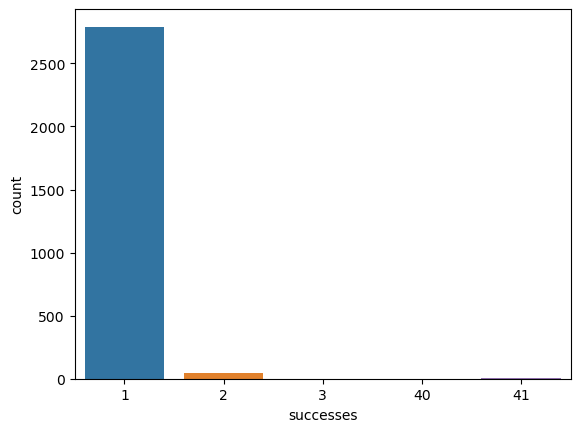

In [40]:
sns.countplot(x = success_counts)

## Задача 7
Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста.  
Определить клиенты какого возраста совершили наибольшее количество успешных действий?

In [43]:
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='count'>

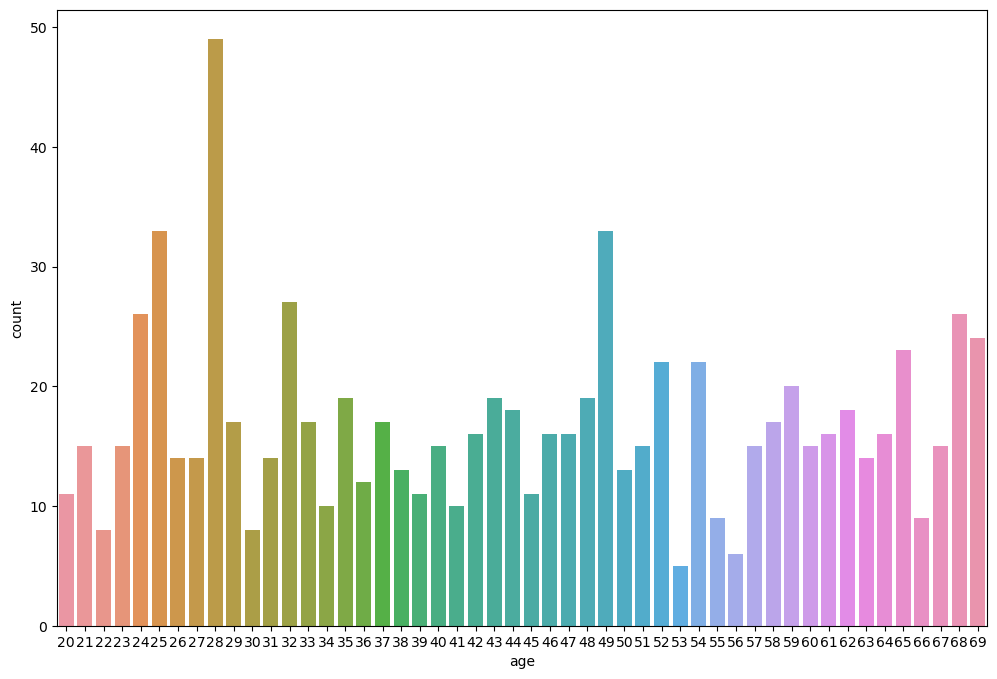

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer')
                                    & (premium_logs.success == True)],
              x = 'age')

Клиенты 28 лет совершили наибольшее количество успешных действий.